Naiva Bayes to model the "Diabetes" dataset. This model will predict which people are likely to develop diabetes.

This is originally from the National Institute of Diabetes and Digestive and Digestive and kideney Diseases.The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [1]:
# Linear algebra
import numpy as np
# Data processing, csv file I/O (e.g. pd.read_csv)
import pandas  as pd 
# Matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load and review data 

In [2]:
cdata = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
# To check first 5 rows of dataset
cdata.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Check numbers of columns and rows in Data Frame
cdata.shape

(100000, 9)

In [5]:
cdata.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# If there are any null values in dataset
cdata.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

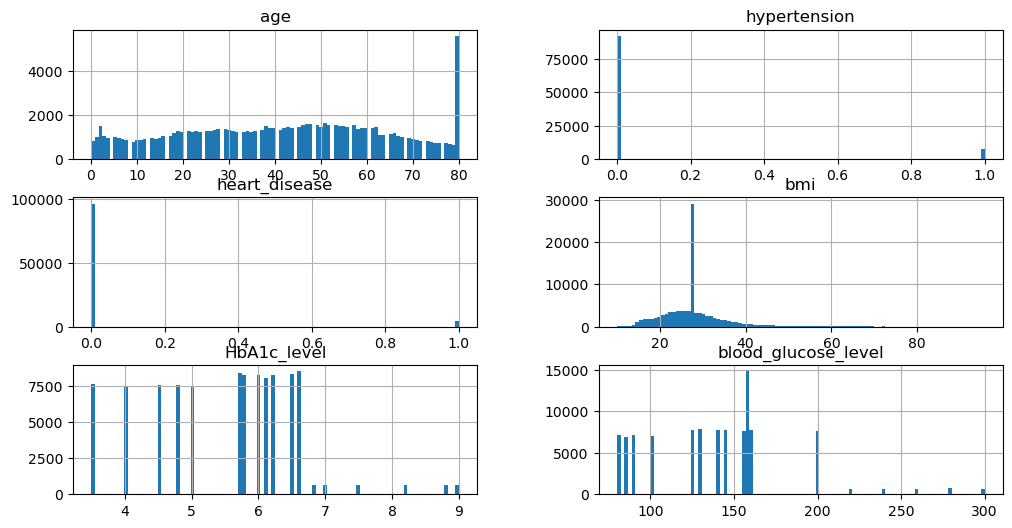

In [8]:
# Excluding outcome columns which has only
columns = list(cdata)[0:-1]
cdata[columns].hist(stacked=False, bins=100, figsize = (12,30), layout=(14,2));
# Histogram of first 6 columns

# Observations

# Age
Uniformly distributed across ages with a sharp peak at around 80 year, likely indicating manypatients are elderly.

# Hypertension
Binary feature (0 or 1).

Vast majority of patients have value 0, measuring most do not have hypertension.

# Heart Disease
Also a binary feature (0 or 1).

Predominantly 0, meaning most patients do not have heart disease.

# BMI
Positively skewed.

Most values lie between 10 and 40 with a heavy concentration around 20-30.

# HbA1c Level
Discrete spikes suggest categorical or bucketed continuous values.

Common values around 5-7 with noticeable jumps.

# Blood Glucose Level
Heavily right-skewed with several distinct spikes, suggesting values are concentrated in specific ranges (like 100-150).

Some extreme outliers beyond 250 are visible.

Dropped the columns which are not useful

In [9]:
cdata = cdata.drop('gender', axis = 1)

In [10]:
cdata = cdata.drop('smoking_history', axis = 1)

Identify Correlation in data

In [11]:
cdata.corr()
# It will show correlation matrix

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [14]:
def plot_corr(df, size=10):
    corr = df.corr()
    plt.figure(figsize=(size, size))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', cbar=True,
                xticklabels=corr.columns, yticklabels=corr.columns)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()

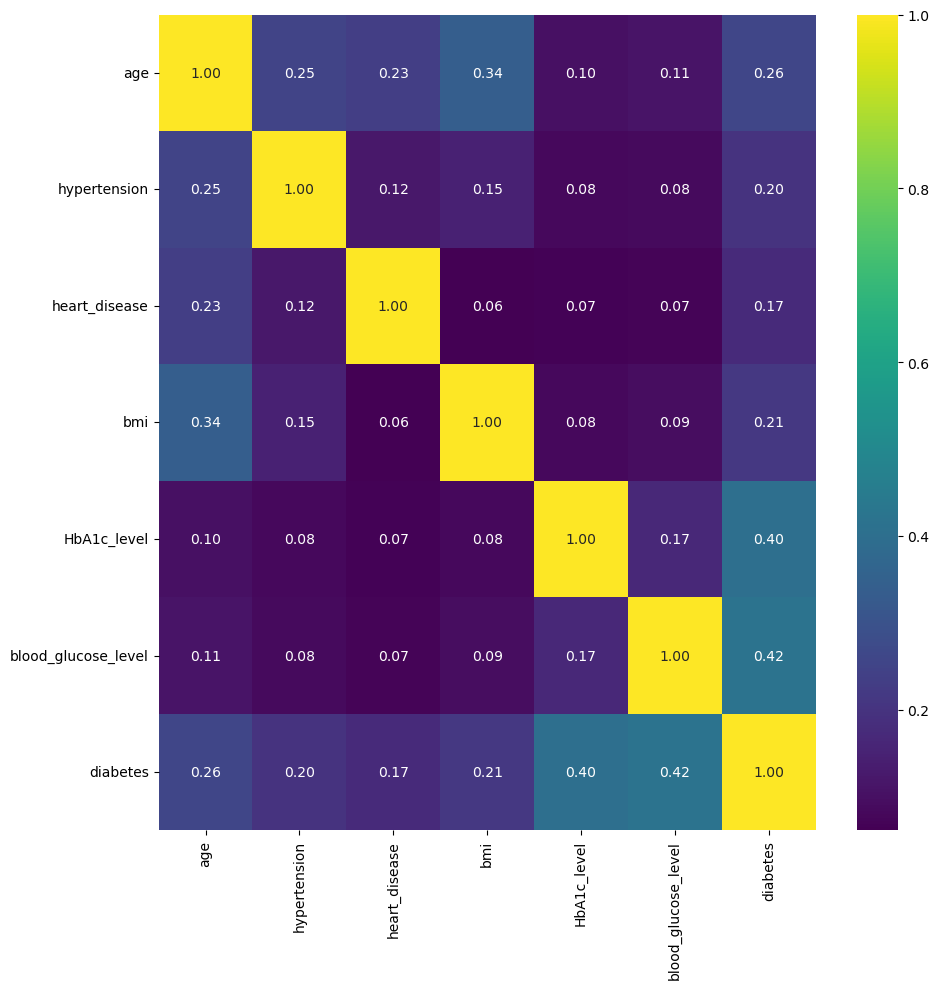

In [16]:
plot_corr(cdata)

Yellow: High/strong correlation (closer to +1 or -1)

Blue: Low/no correlation (closer to 0)

# Observation

1. Age vs Hypertension and age vs Heart Disease: Shows mid positive correlation.

As age increases, likelihood of hypertension or heart disease increases.

Weak or negligible correlation between age and BMI, glucose, HbA1c, and diabetes outcome.

2. Hypertension vs Heart Disease: Slight positive correlation.

Patients with hypertension are more likely to have heart disease.

3. BML: BMI has weak correlation with all other variables, suggesting it may act independently in diabetes prediction.

4. HbA1c and Blood Glucose Level: Shows moderate positive correlation.

Makes sense biologically, as both are indicators of blood sugure levels over time.

5. Diabetes (Target Variable):
HbA1c level and Diabetes: Moderate positive correlation.

Blood Glucose Level and Diabetes: Also shows a moderate to strong positive correlation.

These are the most important predictors of diabetes in this dataset.

Age, Hypertension, Heart Disease: show weak correlation with diabetes.

They may still be relevant but are not strong linear indicators.

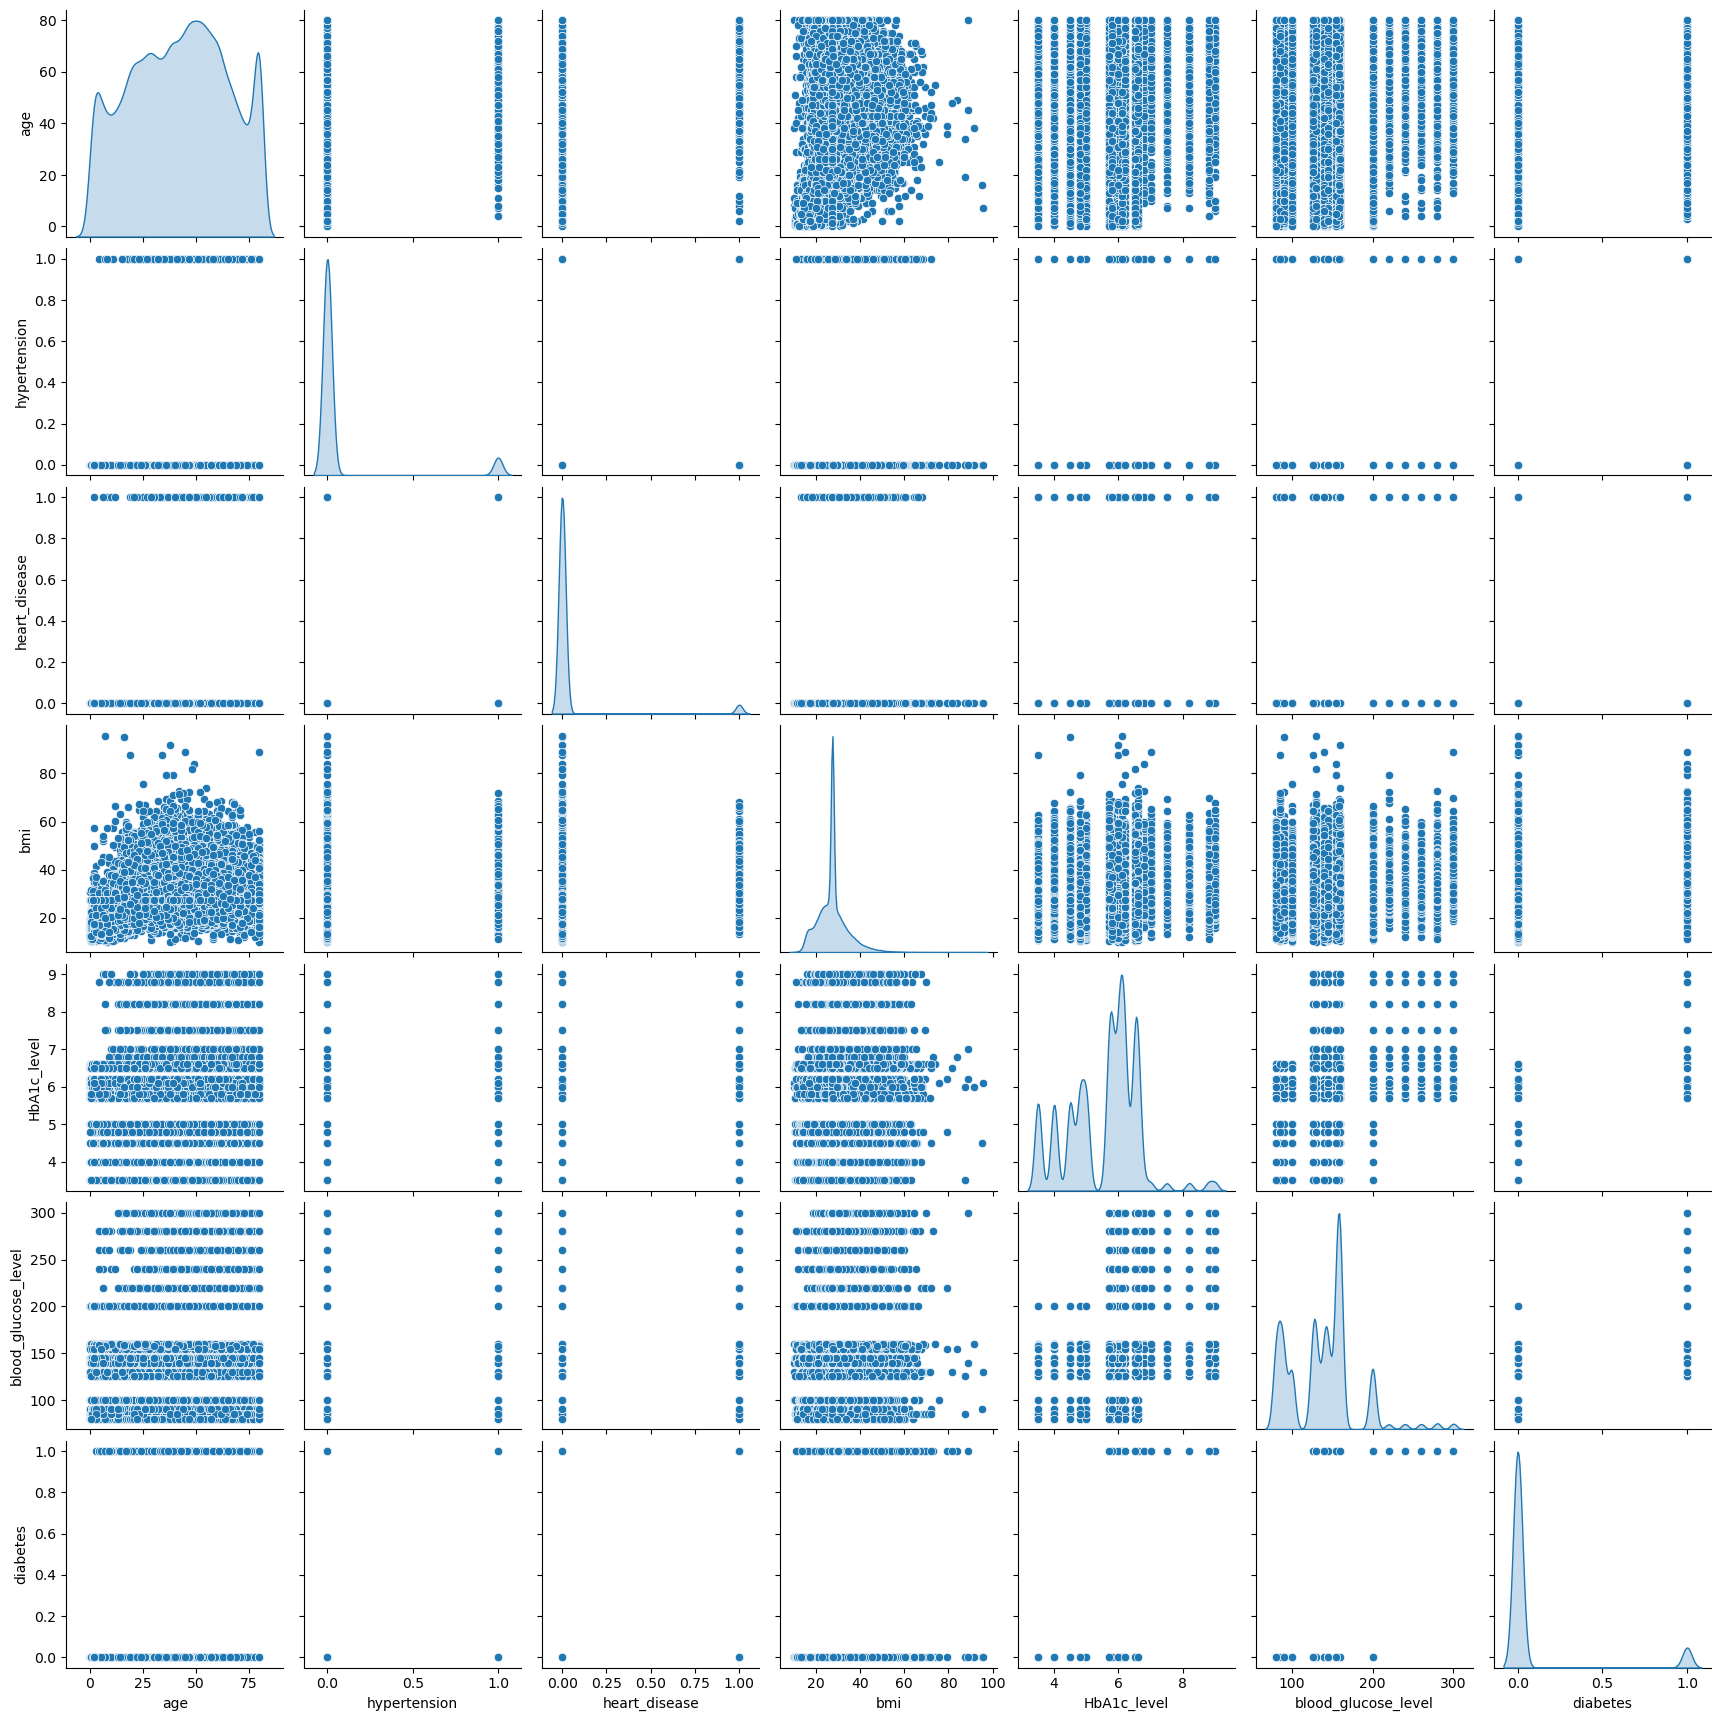

In [15]:
sns.pairplot(cdata,diag_kind='kde')

# Observation
Diagonal plots (KDE plots)

1. Age and BMI have a rooughly normal or skewed distribution.
2. HbA1c level and Blood Glucose Level show a multi-model or discrete distribution, possibly due to binning or measurement steps.
3.  HbA1c level and Blood Glucose Level appear visibly relate, supporting the heatmap.
4.  There is no clear linear separation between diabetic and non-diabetic patients based on individual features, suggesting that a combination of features will be needed for prediction.

Calculate diabetes ratio of True Or False from outcome variable. 

In [16]:
n_true = len(cdata.loc[cdata['diabetes'] == True])
n_false = len(cdata.loc[cdata['diabetes'] == False])
print('Number of true cases : {0} ({1:2.2f}%)'.format(n_true,(n_true/(n_true+n_false))*100))
print('Number of false cases : {0} ({1:2.2f}%)'.format(n_false,(n_false/(n_true+n_false))*100))

Number of true cases : 8500 (8.50%)
Number of false cases : 91500 (91.50%)


We have 8.50% people in current data set who have diabets and reset of 91.50% does not have diabetes.

It is a good distributation True Or False cases of diabetes in data.

# Spliting of data for training and 30% for testing.

70% of data for training and 30% for testing.

In [17]:
from sklearn.model_selection import train_test_split
X = cdata.drop('diabetes', axis=1)     # Predictor feature columns (6 X m)
y = cdata['diabetes']      # Predicted class (1 = True , 0 = False ) (1 X m)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
# 1 is just any random seed number
X_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
80630,17.0,0,0,29.45,6.0,90
62017,10.0,0,0,25.88,3.5,90
5005,24.0,0,0,34.19,6.5,130
56849,48.0,0,0,27.67,3.5,126
42434,51.0,0,0,29.15,5.0,145


Check split of data

In [18]:
print('{0:0.2f}% data is in training set'.format((len(X_train)/len(cdata.index))*100))
print('{0:0.2f}% data is in test set'.format((len(X_test)/len(cdata.index))*100))

70.00% data is in training set
30.00% data is in test set


Check diabetes True Or False ratio in split data

In [19]:
print('Original Diabetes True Values : {0} ({1:0.2f}%)'.format(len(cdata.loc[cdata['diabetes'] == 1]), (len(cdata.loc[cdata['diabetes'] == 1])/len(cdata.index))*100))
print('Original Diabetes False Values : {0} ({1:0.2f}%)'.format(len(cdata.loc[cdata['diabetes'] == 0]), (len(cdata.loc[cdata['diabetes'] == 0])/len(cdata.index))*100))
print(' ')
print('Training Diabetes True Values : {0} ({1:0.2f}%)'.format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values : 8500 (8.50%)
Original Diabetes False Values : 91500 (91.50%)
 
Training Diabetes True Values : 5922 (8.46%)
Training Diabetes False Values : 64078 (91.54%)

Test Diabetes True Values        : 2578 (8.59%)
Test Diabetes False Values       : 27422 (91.41%)



# Data Prepration

Check hidden missing values

We checked missing values earlier but have not got any. But there can be lots be lots of entries with 0 values. We must need to take care of those as well.

In [20]:
X_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
80630,17.0,0,0,29.45,6.0,90
62017,10.0,0,0,25.88,3.5,90
5005,24.0,0,0,34.19,6.5,130
56849,48.0,0,0,27.67,3.5,126
42434,51.0,0,0,29.15,5.0,145


We can lots of 0 entries above.

Replace 0s with serial mean.

In [21]:
# From sklearn.preprocessing import Imputer
# my_imputer = Imputer()
# data_with_imputer_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values = 0, strategy = 'mean')
cols = X_train.columns
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols
X_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,17.0,1.0,1.0,29.45,6.0,90.0
1,10.0,1.0,1.0,25.88,3.5,90.0
2,24.0,1.0,1.0,34.19,6.5,130.0
3,48.0,1.0,1.0,27.67,3.5,126.0
4,51.0,1.0,1.0,29.15,5.0,145.0


Train Naive Bayes algorithm

In [23]:
from sklearn.naive_bayes import GaussianNB   # using Gaussian algorithm from Naive Bayes
# creatw the model
diab_model = GaussianNB()
diab_model.fit(X_train, y_train.ravel())

C:\Users\Asus\AppData\Local\Temp\ipykernel_11776\3530887446.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  diab_model.fit(X_train, y_train.ravel())


GaussianNB()

Performance of our model with training data

In [24]:
diab_train_predict = diab_model.predict(X_train)
from sklearn import metrics
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.9568



Performance of our model with testing data

In [25]:
diab_test_predict = diab_model.predict(X_test)
from sklearn import metrics
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.9561



Check the confusion matrix and classification report

Confussion Metrix


<Axes: >

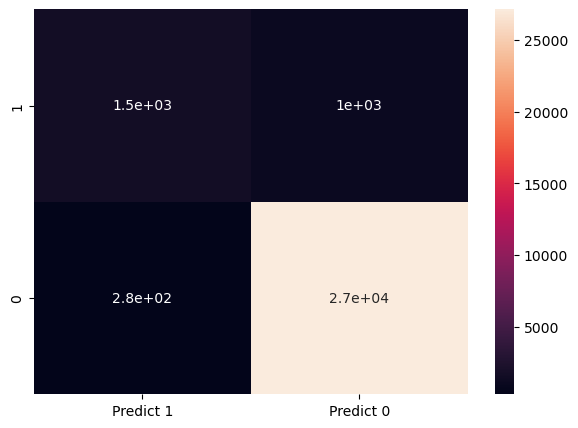

In [63]:
print('Confussion Metrix')
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels = [1,0])
cdata_cm = pd.DataFrame(cm, index = [i for i in ['1','0']], columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(cdata_cm, annot = True)

1. True Negatives(27000):
   Model correctly predicted 1500 patients as diabetic
2. True Positive(1500):
   Model correctly predicted 1500 patients as diabetic.
3. False Negative(1000):
   Model missed 1000 diabetic patients.
4. False Positives(800):
   Model wrongly predicted 800 non diabetic patients as diabetic.

In [64]:
print('Classification Report')
print(metrics.classification_report(y_test, diab_test_predict, labels= [1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.60      0.70      2578
           0       0.96      0.99      0.98     27422

    accuracy                           0.96     30000
   macro avg       0.91      0.79      0.84     30000
weighted avg       0.95      0.96      0.95     30000

